Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC-AUC Score: 0.8100143407770218
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



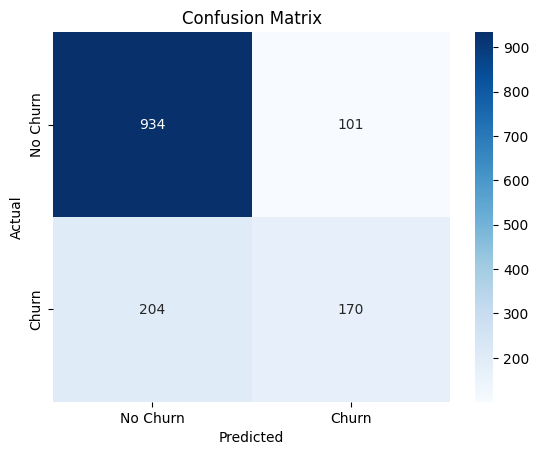

Optimized Model ROC-AUC Score: 0.8184388643467928
Optimized Model saved as logistic_regression_best_model.pkl


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt  # Add this line


# Load the preprocessed dataset
df = pd.read_csv('/Users/suryanshu/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Ensure all features are numeric
X = df.drop('Churn', axis=1)  # Drop the target column
y = df['Churn'].map({'No': 0, 'Yes': 1})  # Encode target column as numeric (0 for No, 1 for Yes)

# Drop irrelevant columns
if 'customerID' in X.columns:  # Drop 'customerID' if it exists
    X = X.drop(['customerID'], axis=1)

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Keep only numeric columns
X = X.select_dtypes(include=[float, int])

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Hyperparameter Tuning Using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithms
    'penalty': ['l2']  # Regularization type
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc', verbose=1)
grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best ROC-AUC Score:", grid.best_score_)

# Train the optimized model
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

# 2. Evaluate the Optimized Model
# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("Optimized Model ROC-AUC Score:", roc_auc)

# Save the Optimized Model
import joblib
joblib.dump(best_model, '../models/logistic_regression_best_model.pkl')
print("Optimized Model saved as logistic_regression_best_model.pkl")